In [59]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [60]:
# Loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

data

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


In [61]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [62]:
# Create sequences for LSTM input and output
sequence_length = 12 # 12 months in each sequence
X = []
y = []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i: i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [63]:
#Split data into trainig and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [64]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [65]:
# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 8/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 9/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 10/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 11/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/50
141/141 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 13/50
141/141 [====

In [66]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions for meaningful values
predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, :, 0], predictions), axis=1))[:, 1]

18/18 [==============================] - 0s 2ms/step


In [67]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
print_error(y_train, y_test, train_predict, test_predict)

18/18 [==============================] - 0s 2ms/step
Train RMSE: 0.059 RMSE
Test RMSE: 0.077 RMSE


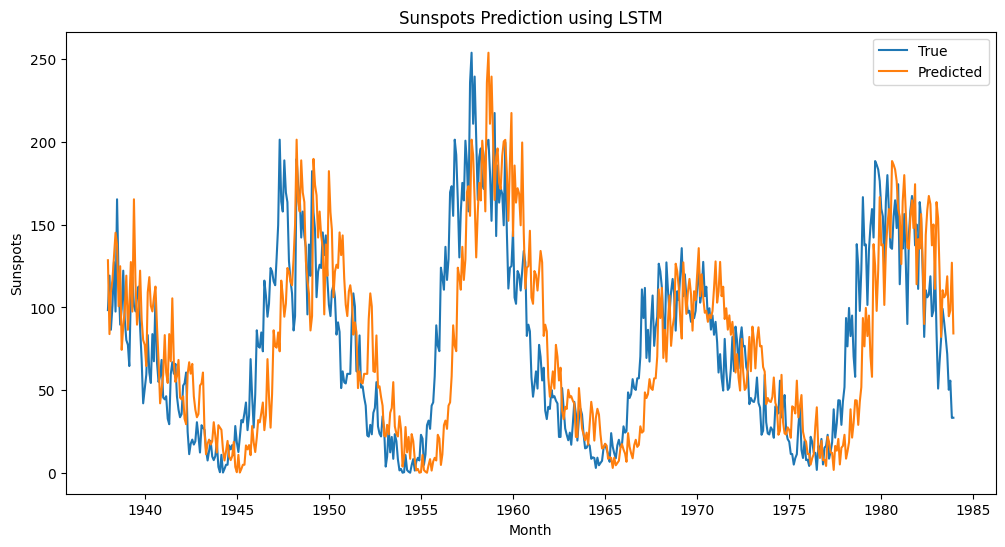

In [68]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+sequence_length:], data['Sunspots'][train_size+sequence_length:], label='True')
plt.plot(data.index[train_size+sequence_length:], predictions_inv, label='Predicted')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.title('Sunspots Prediction using LSTM')
plt.show()